In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv("./SeattleData/train.csv")
test=pd.read_csv("./SeattleData/test.csv")

DATA PREPROCESSING

In [6]:
print(train.head())
print(train.dtypes)
print(train.describe())



   beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0     3    2.5  2590.0       sqft   6000.00           sqft     98144   
1     4    2.0  2240.0       sqft      0.31           acre     98106   
2     4    3.0  2040.0       sqft   3783.00           sqft     98107   
3     4    3.0  3800.0       sqft   5175.00           sqft     98199   
4     2    2.0  1042.0       sqft       NaN            NaN     98102   

       price  
0   795000.0  
1   915000.0  
2   950000.0  
3  1950000.0  
4   950000.0  
beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object
              beds        baths          size     lot_size      zip_code  \
count  2016.000000  2016.000000   2016.000000  1669.000000   2016.000000   
mean      2.857639     2.159970   1735.740575  3871.059694  98123.638889   
std       1.255092     1.00

In [8]:
print(train.isnull().sum())


beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64


In [9]:
train = train.dropna(subset=['lot_size', 'lot_size_units']).reset_index(drop=True)


EXPLORATORY DATA ANALYSIS

In [11]:
def convert_lot_size(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560  # Convert acres to sqft
    else:
        return row['lot_size']

train['lot_size_sqft'] = train.apply(convert_lot_size, axis=1)


In [15]:
df=train

In [16]:
df['beds'] = df['beds'].astype(int)
df['baths'] = df['baths'].astype(float)
df['size'] = df['size'].astype(float)
df['lot_size_sqft'] = df['lot_size_sqft'].astype(float)
df['zip_code'] = df['zip_code'].astype(str)  # Zip codes as strings
df['price'] = df['price'].astype(float)


In [17]:
print(df.describe())


              beds        baths          size         price  lot_size_sqft
count  1669.000000  1669.000000   1669.000000  1.669000e+03   1.669000e+03
mean      3.122229     2.294488   1893.097663  1.038475e+06   1.878995e+04
std       1.186723     1.008658    916.952780  1.007944e+06   2.880682e+05
min       1.000000     0.500000    250.000000  1.590000e+05   5.000000e+02
25%       2.000000     1.500000   1260.000000  6.800000e+05   2.734000e+03
50%       3.000000     2.000000   1719.000000  8.650000e+05   5.000000e+03
75%       4.000000     3.000000   2360.000000  1.175000e+06   7.389000e+03
max      15.000000     9.000000  11010.000000  2.500000e+07   1.089000e+07


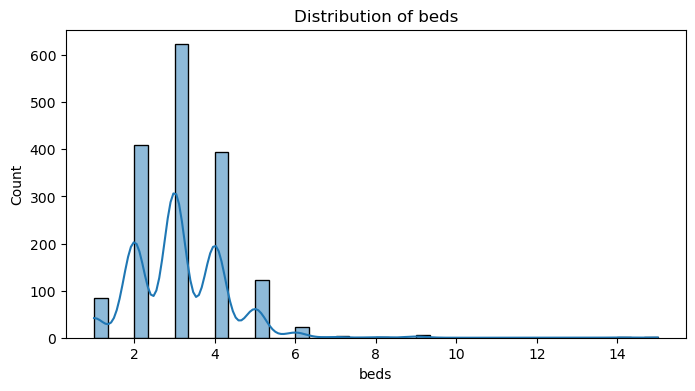

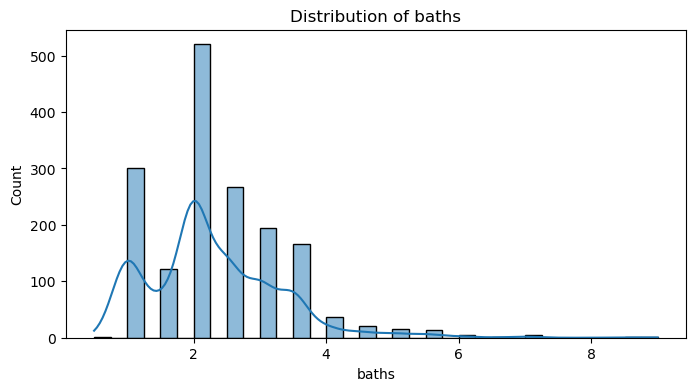

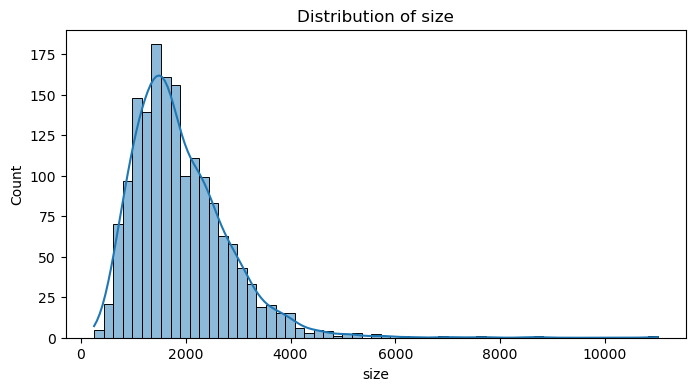

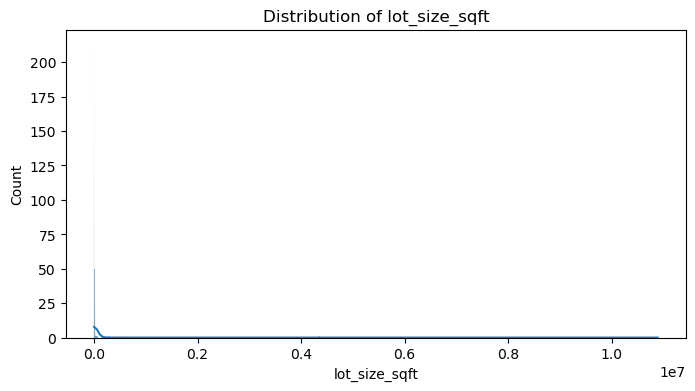

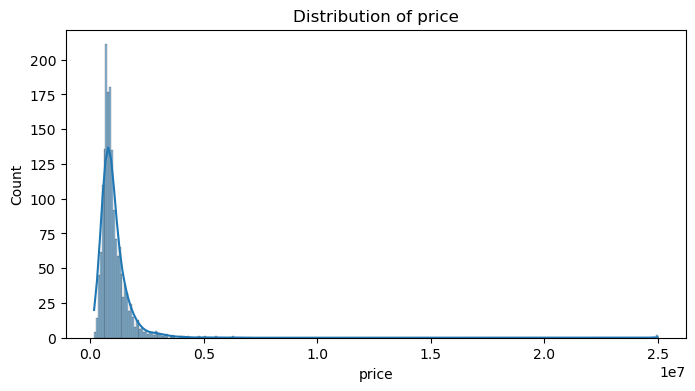

In [18]:
numerical_features = ['beds', 'baths', 'size', 'lot_size_sqft', 'price']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [19]:
df

,beds,baths,size,size_units,zip_code,price,lot_size_sqft
0,3,2.5,2590.0,sqft,98144,795000.0,6000.0
1,4,2.0,2240.0,sqft,98106,915000.0,13503.6
2,4,3.0,2040.0,sqft,98107,950000.0,3783.0
3,4,3.0,3800.0,sqft,98199,1950000.0,5175.0
4,2,2.0,1190.0,sqft,98107,740000.0,43560.0
...,...,...,...,...,...,...,...
1664,3,3.5,1680.0,sqft,98126,675000.0,1486.0
1665,2,2.0,1400.0,sqft,98199,699950.0,14810.4
1666,3,2.0,1370.0,sqft,98112,910000.0,21780.0
1667,4,2.0,2140.0,sqft,98199,1150000.0,6250.0


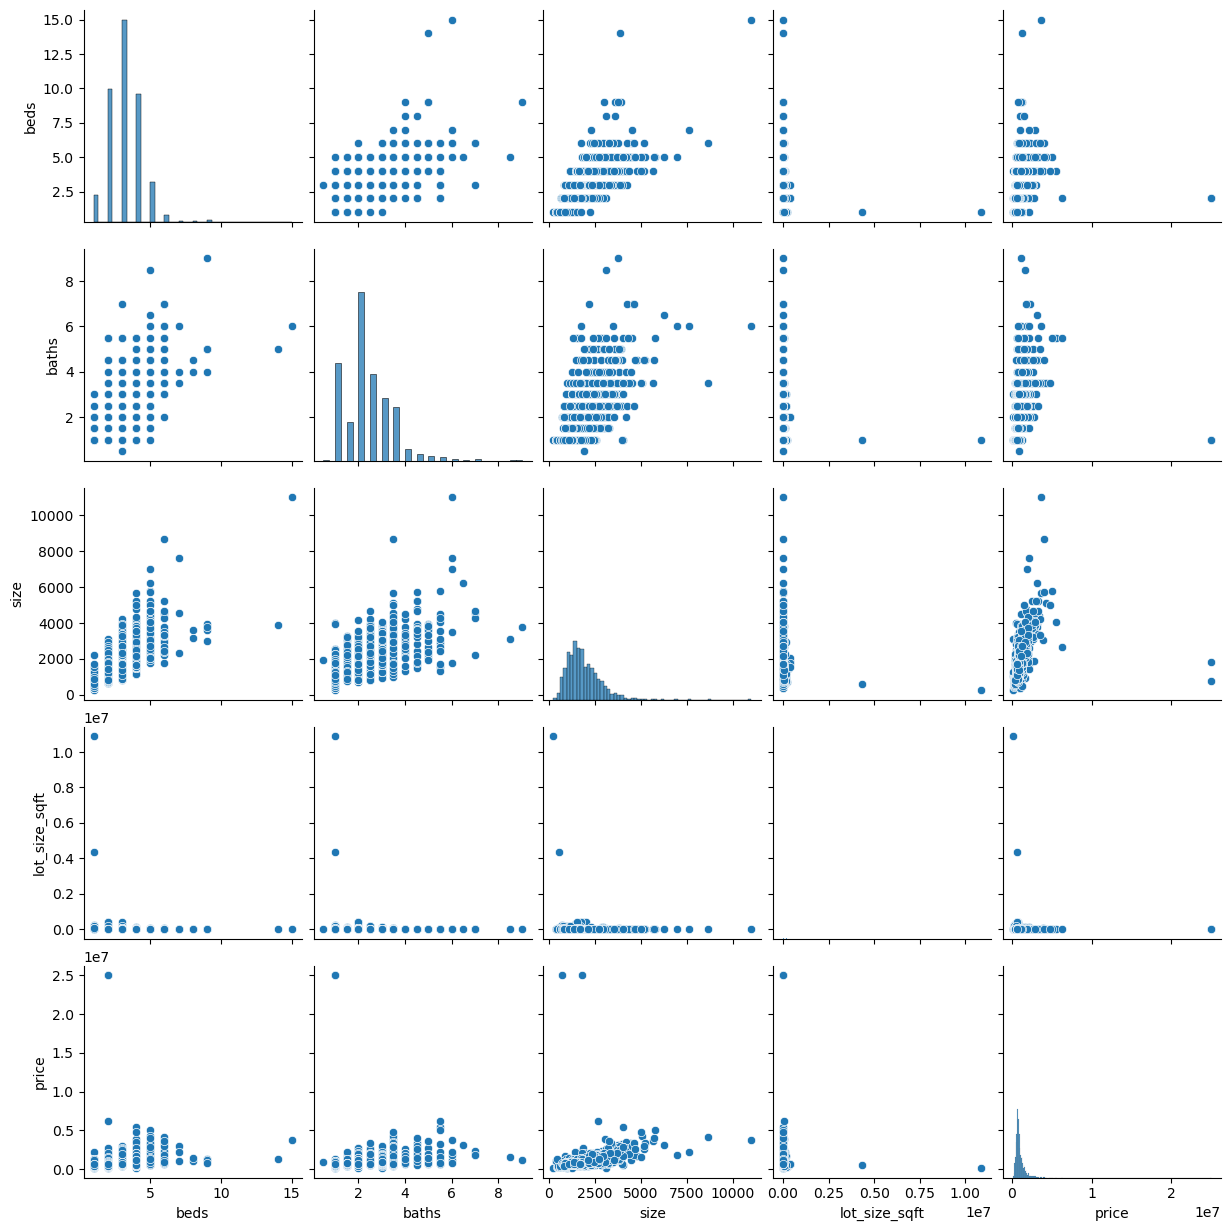

In [20]:
sns.pairplot(df[numerical_features])
plt.show()


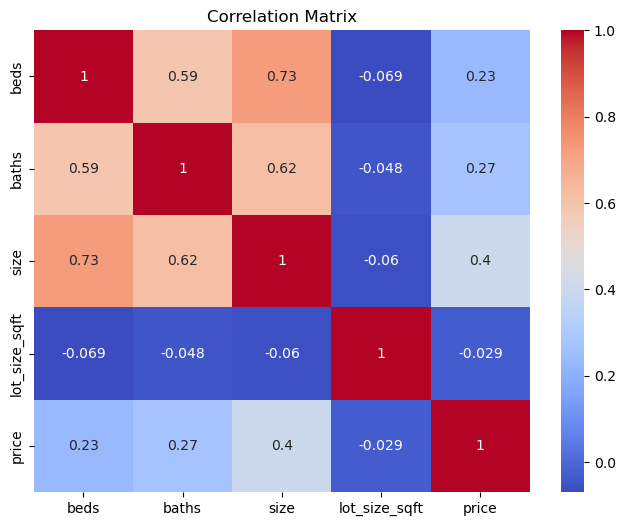

In [21]:
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


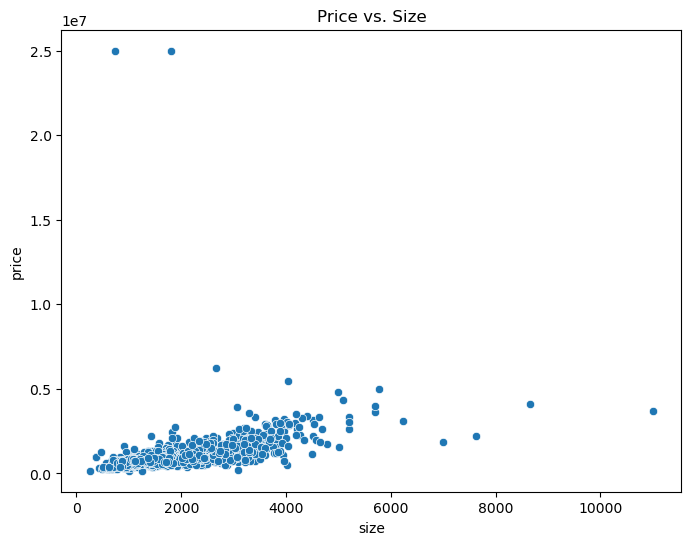

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='price', data=df)
plt.title('Price vs. Size')
plt.show()


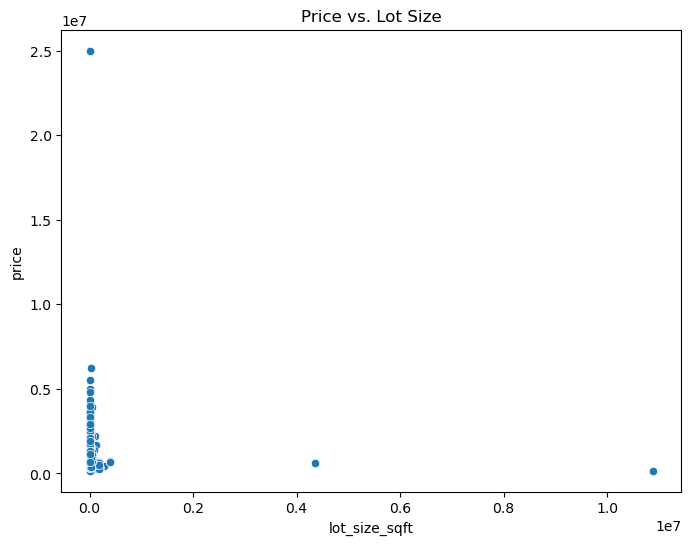

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lot_size_sqft', y='price', data=df)
plt.title('Price vs. Lot Size')
plt.show()


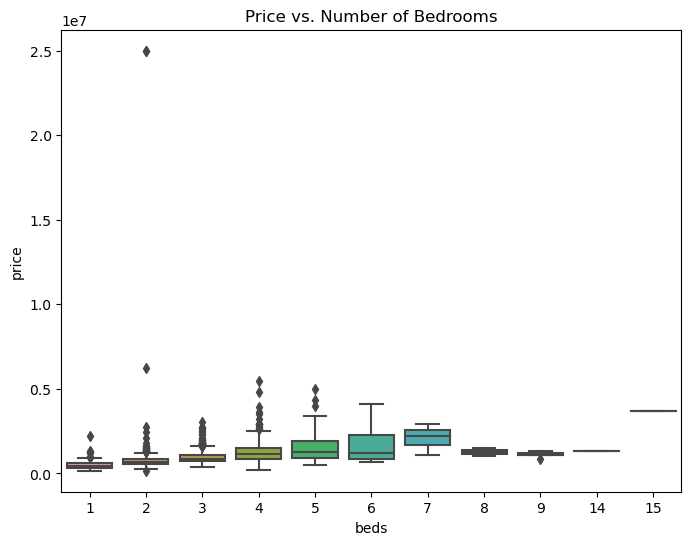

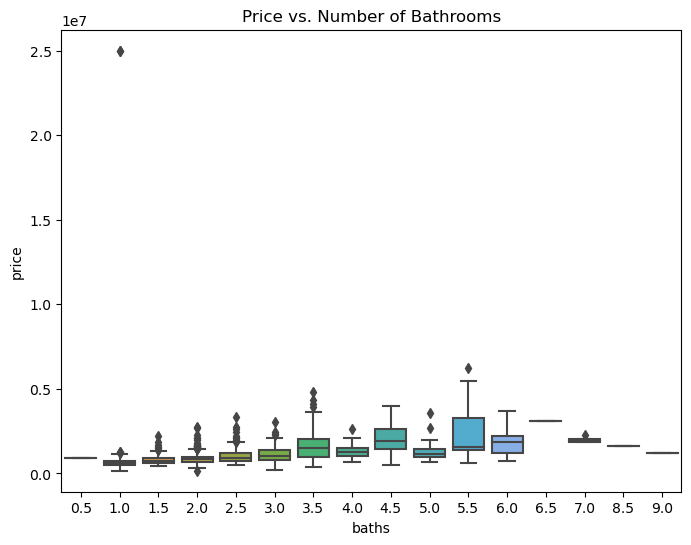

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='beds', y='price', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='baths', y='price', data=df)
plt.title('Price vs. Number of Bathrooms')
plt.show()


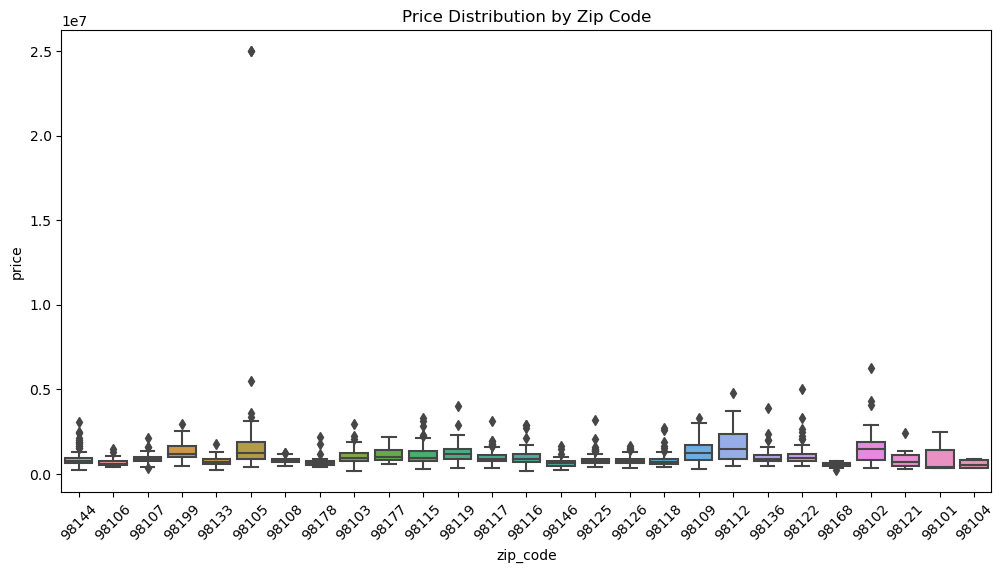

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='zip_code', y='price', data=df)
plt.title('Price Distribution by Zip Code')
plt.xticks(rotation=45)
plt.show()


In [26]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f'Number of outliers in price: {outliers.shape[0]}')


Number of outliers in price: 104


In [27]:
df['log_price'] = np.log(df['price'])
df['log_size'] = np.log(df['size'])


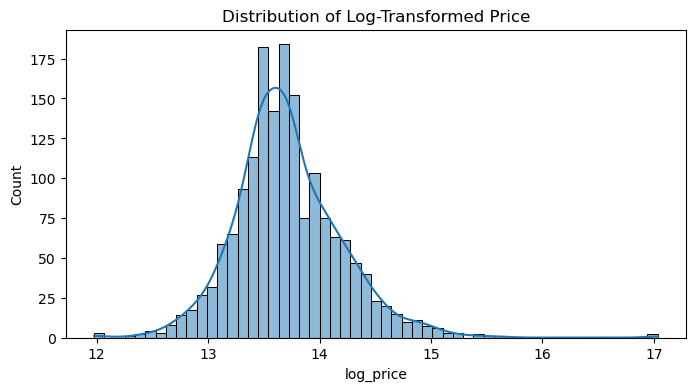

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.show()


In [29]:
df['price_per_sqft'] = df['price'] / df['size']


In [30]:
df['bed_category'] = pd.cut(df['beds'], bins=[0, 2, 4, 6, np.inf], labels=['1-2', '3-4', '5-6', '7+'])
df['bath_category'] = pd.cut(df['baths'], bins=[0, 1, 2, 3, np.inf], labels=['1', '2', '3', '4+'])


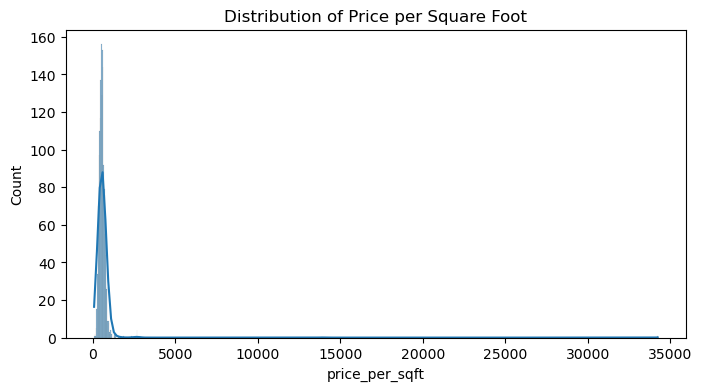

In [31]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price_per_sqft'].dropna(), kde=True)
plt.title('Distribution of Price per Square Foot')
plt.show()


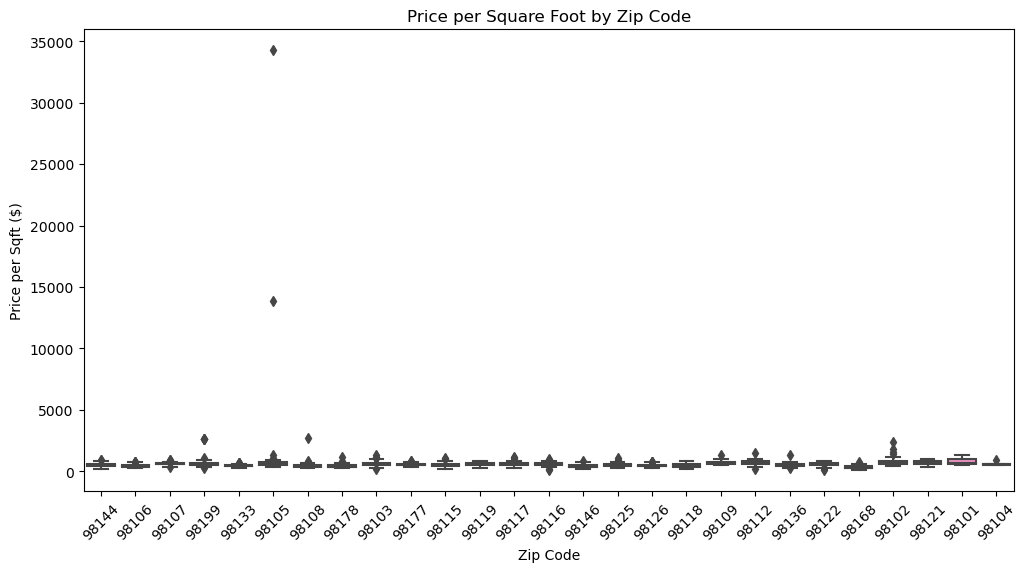

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='zip_code', y='price_per_sqft', data=df)
plt.title('Price per Square Foot by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Price per Sqft ($)')
plt.xticks(rotation=45)
plt.show()


In [33]:
df

,beds,baths,size,size_units,zip_code,price,lot_size_sqft,log_price,log_size,price_per_sqft,bed_category,bath_category
0,3,2.5,2590.0,sqft,98144,795000.0,6000.0,13.586097,7.859413,306.949807,3-4,3
1,4,2.0,2240.0,sqft,98106,915000.0,13503.6,13.726679,7.714231,408.482143,3-4,2
2,4,3.0,2040.0,sqft,98107,950000.0,3783.0,13.764217,7.620705,465.686275,3-4,3
3,4,3.0,3800.0,sqft,98199,1950000.0,5175.0,14.483340,8.242756,513.157895,3-4,3
4,2,2.0,1190.0,sqft,98107,740000.0,43560.0,13.514405,7.081709,621.848739,1-2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1664,3,3.5,1680.0,sqft,98126,675000.0,1486.0,13.422468,7.426549,401.785714,3-4,4+
1665,2,2.0,1400.0,sqft,98199,699950.0,14810.4,13.458764,7.244228,499.964286,1-2,2
1666,3,2.0,1370.0,sqft,98112,910000.0,21780.0,13.721200,7.222566,664.233577,3-4,2
1667,4,2.0,2140.0,sqft,98199,1150000.0,6250.0,13.955273,7.668561,537.383178,3-4,2


In [34]:
test_df=test

In [35]:
# Use median/mean from the training dataset
lot_size_median = df['lot_size_sqft'].median()
test_df['lot_size_sqft'] = df['lot_size_sqft'].fillna(lot_size_median)


In [36]:
def convert_lot_size(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560  # Convert acres to sqft
    elif row['lot_size_units'] == 'sqft':
        return row['lot_size']
    else:
        return np.nan

test_df['lot_size_sqft'] = test_df.apply(convert_lot_size, axis=1)


In [37]:
test_df['log_price'] = np.log(test_df['price'])
test_df['log_size'] = np.log(test_df['size'])


In [38]:
test_df['price_per_sqft'] = test_df['price'] / test_df['size']


In [39]:
# Binning for beds
test_df['bed_category'] = pd.cut(
    test_df['beds'], bins=[0, 2, 4, 6, np.inf], labels=['1-2', '3-4', '5-6', '7+']
)
# Binning for baths
test_df['bath_category'] = pd.cut(
    test_df['baths'], bins=[0, 1, 2, 3, np.inf], labels=['1', '2', '3', '4+']
)


In [54]:
test_df.drop(columns=['lot_size_units'], inplace=True)  # Directly drop the column
test_df

,beds,baths,size,size_units,zip_code,price,lot_size_sqft,log_price,log_size,price_per_sqft,bed_category,bath_category
0,3,3.0,2850.0,sqft,98119,1175000.0,4200.0,13.976779,7.955074,412.280702,3-4,3
1,4,5.0,3040.0,sqft,98106,1057500.0,5002.0,13.871418,8.019613,347.861842,3-4,4+
2,3,1.0,1290.0,sqft,98125,799000.0,6048.0,13.591116,7.162397,619.379845,3-4,1
3,3,2.0,2360.0,sqft,98188,565000.0,12196.8,13.244581,7.766417,239.406780,3-4,2
4,3,3.5,1942.0,sqft,98107,1187000.0,1603.0,13.986940,7.571474,611.225541,3-4,4+
...,...,...,...,...,...,...,...,...,...,...,...,...
423,5,4.5,5580.0,sqft,98146,3800000.0,13068.0,15.150512,8.626944,681.003584,5-6,4+
424,3,2.5,1390.0,sqft,98126,575000.0,1570.0,13.262125,7.237059,413.669065,3-4,3
425,3,2.5,2950.0,sqft,98118,3105000.0,20473.2,14.948524,7.989560,1052.542373,3-4,3
426,5,5.0,3010.0,sqft,98115,1807000.0,4887.0,14.407179,8.009695,600.332226,5-6,4+


In [41]:
df

,beds,baths,size,size_units,zip_code,price,lot_size_sqft,log_price,log_size,price_per_sqft,bed_category,bath_category
0,3,2.5,2590.0,sqft,98144,795000.0,6000.0,13.586097,7.859413,306.949807,3-4,3
1,4,2.0,2240.0,sqft,98106,915000.0,13503.6,13.726679,7.714231,408.482143,3-4,2
2,4,3.0,2040.0,sqft,98107,950000.0,3783.0,13.764217,7.620705,465.686275,3-4,3
3,4,3.0,3800.0,sqft,98199,1950000.0,5175.0,14.483340,8.242756,513.157895,3-4,3
4,2,2.0,1190.0,sqft,98107,740000.0,43560.0,13.514405,7.081709,621.848739,1-2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1664,3,3.5,1680.0,sqft,98126,675000.0,1486.0,13.422468,7.426549,401.785714,3-4,4+
1665,2,2.0,1400.0,sqft,98199,699950.0,14810.4,13.458764,7.244228,499.964286,1-2,2
1666,3,2.0,1370.0,sqft,98112,910000.0,21780.0,13.721200,7.222566,664.233577,3-4,2
1667,4,2.0,2140.0,sqft,98199,1150000.0,6250.0,13.955273,7.668561,537.383178,3-4,2


In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [69]:
# Define features and target from the training dataset
X = df[['log_size', 'lot_size_sqft', 'price_per_sqft']]
X = pd.get_dummies(X.join(df[['bed_category', 'bath_category']]))

y = df['log_price']  # Transformed target

# Define features and target from the test dataset
X_test = test_df[['log_size', 'lot_size_sqft', 'price_per_sqft']]
X_test = pd.get_dummies(X_test.join(test_df[['bed_category', 'bath_category']]))

y_test = test_df['log_price']  # Transformed target
# Align columns between train and test sets
X_test = X_test.reindex(columns=X.columns, fill_value=0)


In [70]:
#feature scaling
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['log_size', 'lot_size_sqft', 'price_per_sqft']

# Initialize the scaler
scaler = StandardScaler()

# Scale the training features
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Scale the test features
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# Predictions on test data
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_lr = r2_score(y_test, y_pred_test_lr)

print(f"Linear Regression - Test MSE: {mse_lr:.4f}, Test R²: {r2_lr:.4f}")


Linear Regression - Test MSE: 0.0816, Test R²: 0.6614


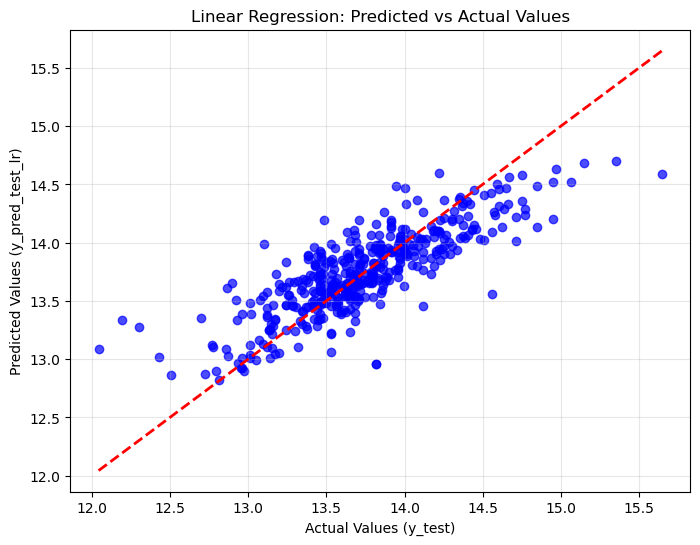

In [90]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_lr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test_lr)')
plt.grid(alpha=0.3)
plt.show()


In [78]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # Adjust alpha if needed
lasso_model.fit(X_scaled, y)

# Predictions on test data
y_pred_test_lasso = lasso_model.predict(X_test_scaled)

# Metrics for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_lasso = r2_score(y_test, y_pred_test_lasso)

print(f"Lasso Regression - Test MSE: {mse_lasso:.4f}, Test R²: {r2_lasso:.4f}")


Lasso Regression - Test MSE: 0.0882, Test R²: 0.6339


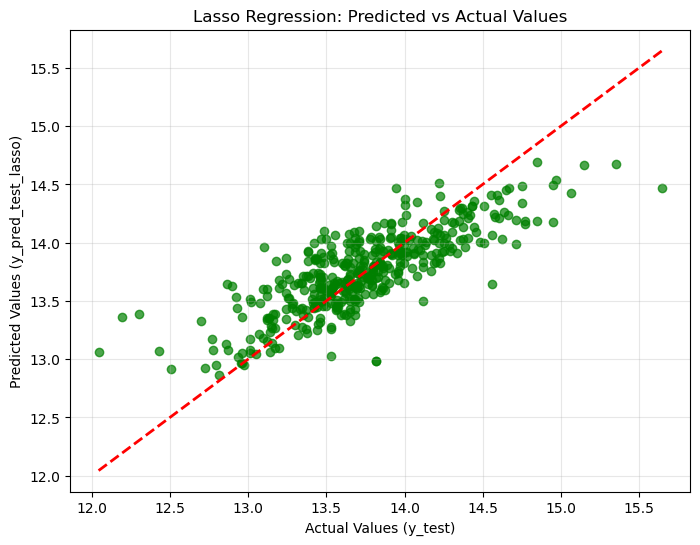

In [91]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values for Lasso Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_lasso, alpha=0.7, color='green')  # Lasso predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect line
plt.title('Lasso Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test_lasso)')
plt.grid(alpha=0.3)
plt.show()


In [82]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # Adjust alpha if needed
ridge_model.fit(X_scaled, y)

# Predictions on test data
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

# Metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_ridge = r2_score(y_test, y_pred_test_ridge)

print(f"Ridge Regression - Test MSE: {mse_ridge:.4f}, Test R²: {r2_ridge:.4f}")


Ridge Regression - Test MSE: 0.0814, Test R²: 0.6622


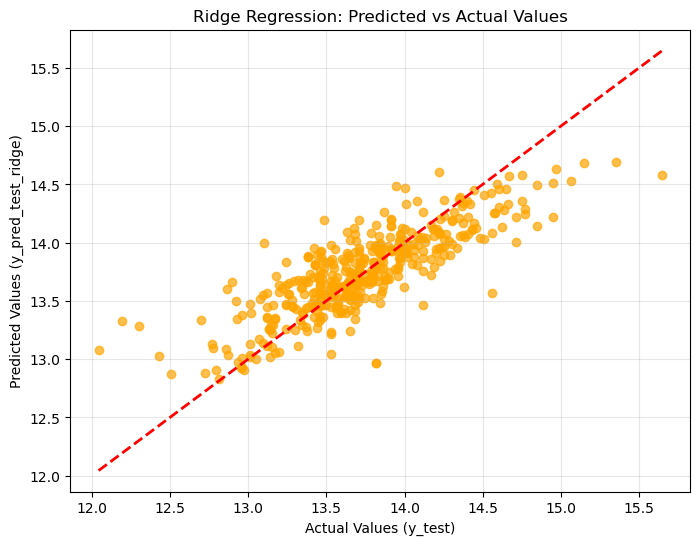

In [92]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_ridge, alpha=0.7, color='orange')  # Ridge predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect line
plt.title('Ridge Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test_ridge)')
plt.grid(alpha=0.3)
plt.show()


In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_scaled, y)

# Predictions on test data
y_pred_test_gb = gb_model.predict(X_test_scaled)

# Metrics for Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_test_gb)
r2_gb = r2_score(y_test, y_pred_test_gb)

print(f"Gradient Boosting - Test MSE: {mse_gb:.4f}, Test R²: {r2_gb:.4f}")


Gradient Boosting - Test MSE: 0.0015, Test R²: 0.9939


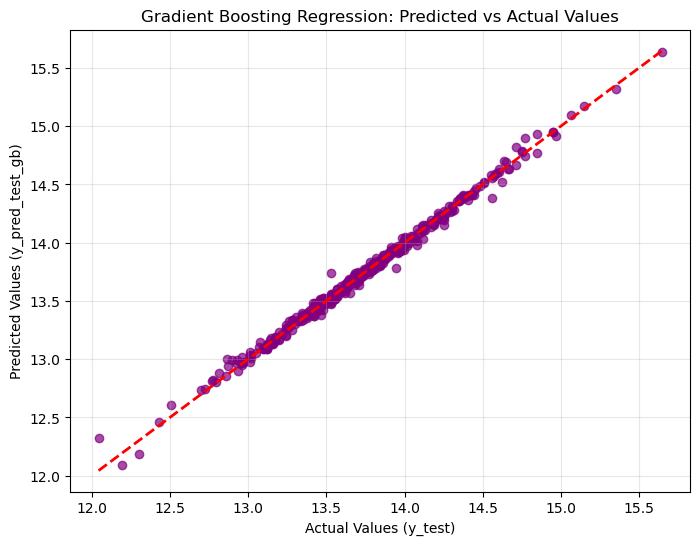

In [93]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_gb, alpha=0.7, color='purple')  # Gradient Boosting predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect line
plt.title('Gradient Boosting Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test_gb)')
plt.grid(alpha=0.3)
plt.show()


In [84]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_scaled, y)

# Predictions on test data
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

# Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"XGBoost - Test MSE: {mse_xgb:.4f}, Test R²: {r2_xgb:.4f}")


XGBoost - Test MSE: 0.0030, Test R²: 0.9876


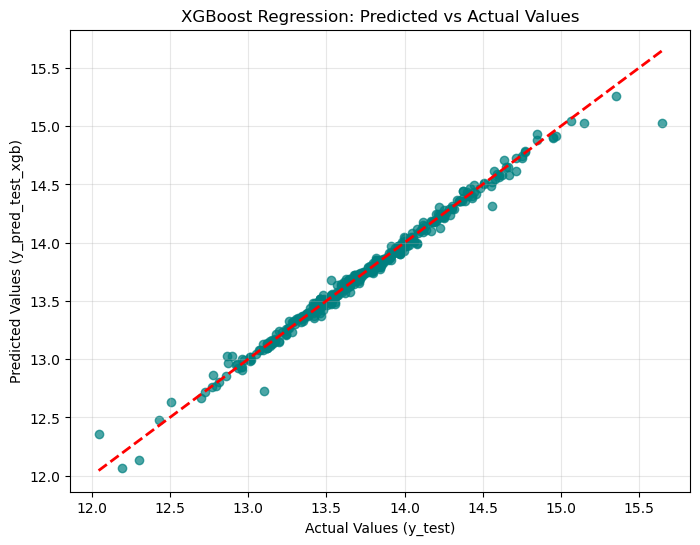

In [94]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_xgb, alpha=0.7, color='teal')  # XGBoost predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect line
plt.title('XGBoost Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test_xgb)')
plt.grid(alpha=0.3)
plt.show()


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, input_dim=X_scaled.shape[1], activation='sigmoid'),  # Input layer
    Dense(32, activation='sigmoid'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

# Train the model
nn_model.fit(X_scaled, y, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Predictions on test data
y_pred_test_nn = nn_model.predict(X_test_scaled).flatten()

# Metrics for Neural Network
mse_nn = mean_squared_error(y_test, y_pred_test_nn)
r2_nn = r2_score(y_test, y_pred_test_nn)

print(f"Neural Network - Test MSE: {mse_nn:.4f}, Test R²: {r2_nn:.4f}")


Epoch 1/50


/Users/harshith/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 72.0763 - mse: 72.0763 - val_loss: 0.4341 - val_mse: 0.4341
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2795 - mse: 0.2795 - val_loss: 0.2420 - val_mse: 0.2420
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2249 - mse: 0.2249 - val_loss: 0.2410 - val_mse: 0.2410
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2228 - mse: 0.2228 - val_loss: 0.2404 - val_mse: 0.2404
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2229 - mse: 0.2229 - val_loss: 0.2413 - val_mse: 0.2413
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2153 - mse: 0.2153 - val_loss: 0.2390 - val_mse: 0.2390
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2506 - mse: 0.2506 - val_loss: 0.2386 - val_mse: 0.2386
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2132 - mse: 0.2132 - val_loss: 0.2376 - val_mse: 0.2376
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2318 - mse: 0.2318 -

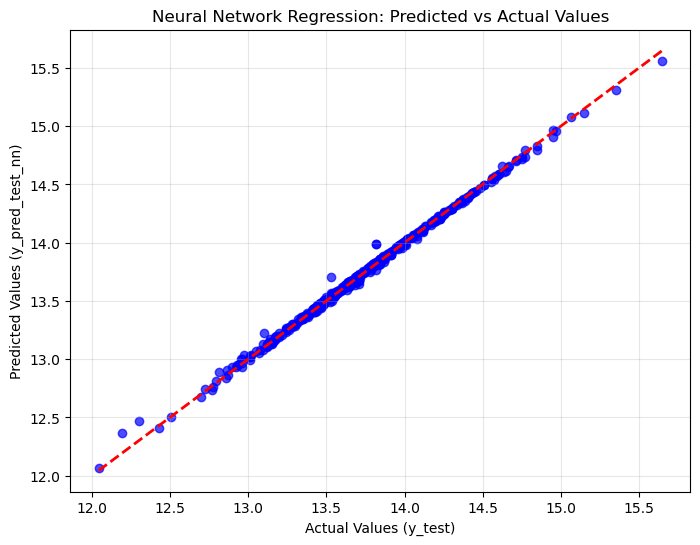

In [100]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values for Neural Network
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_nn, alpha=0.7, color='blue')  # Neural Network predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect line
plt.title('Neural Network Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test_nn)')
plt.grid(alpha=0.3)
plt.show()


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_scaled, y)

# Predictions on test data
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_rf = r2_score(y_test, y_pred_test_rf)

print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test R²: {r2_rf:.4f}")


Random Forest - Test MSE: 0.0024, Test R²: 0.9900


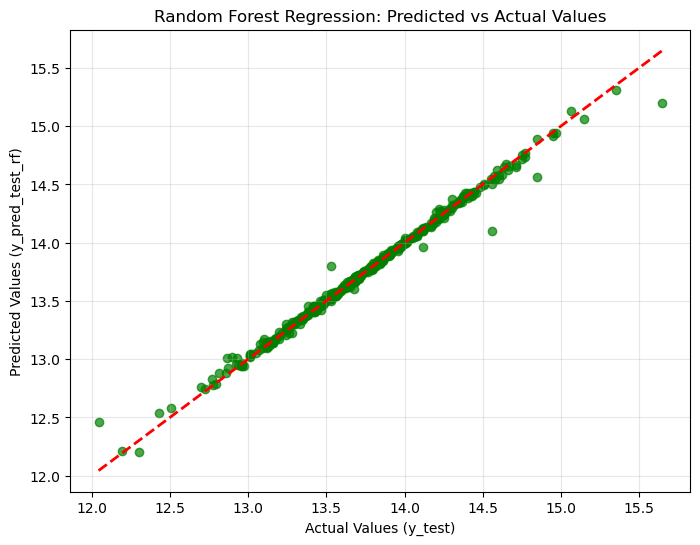

In [96]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_rf, alpha=0.7, color='green')  # Random Forest predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect line
plt.title('Random Forest Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test_rf)')
plt.grid(alpha=0.3)
plt.show()
